In [237]:
#IMPORTS
import csv
import collections
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
!pip install plotly
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
import random
random.seed(10)
from matplotlib.pyplot import figure
import math
import matplotlib.patches as mpatches
from numpy import cov
import seaborn as sns

In [2]:
#RAW DATA
raw_data_path = '/Users/zoeweiss/Desktop/Desktop/lab(s)/barnighausen/TZAH2006/TZA.csv'

with open(raw_data_path, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

raw_data = data[1:]

In [5]:
question_slots = []
questions_answered = []
for person in raw_data:
    question_slots.append(len(person))
    questions_answered.append(len(list(filter(None, person))))
    

Text(0, 0.5, 'Frequency')

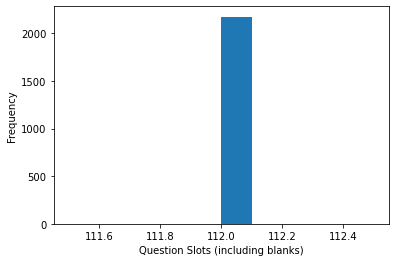

In [12]:
plt.hist(question_slots)
plt.xlabel('Question Slots (including blanks)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

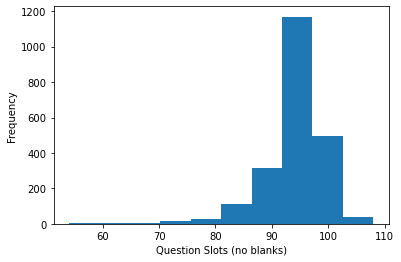

In [13]:
plt.hist(questions_answered)
plt.xlabel('Question Slots (no blanks)')
plt.ylabel('Frequency')

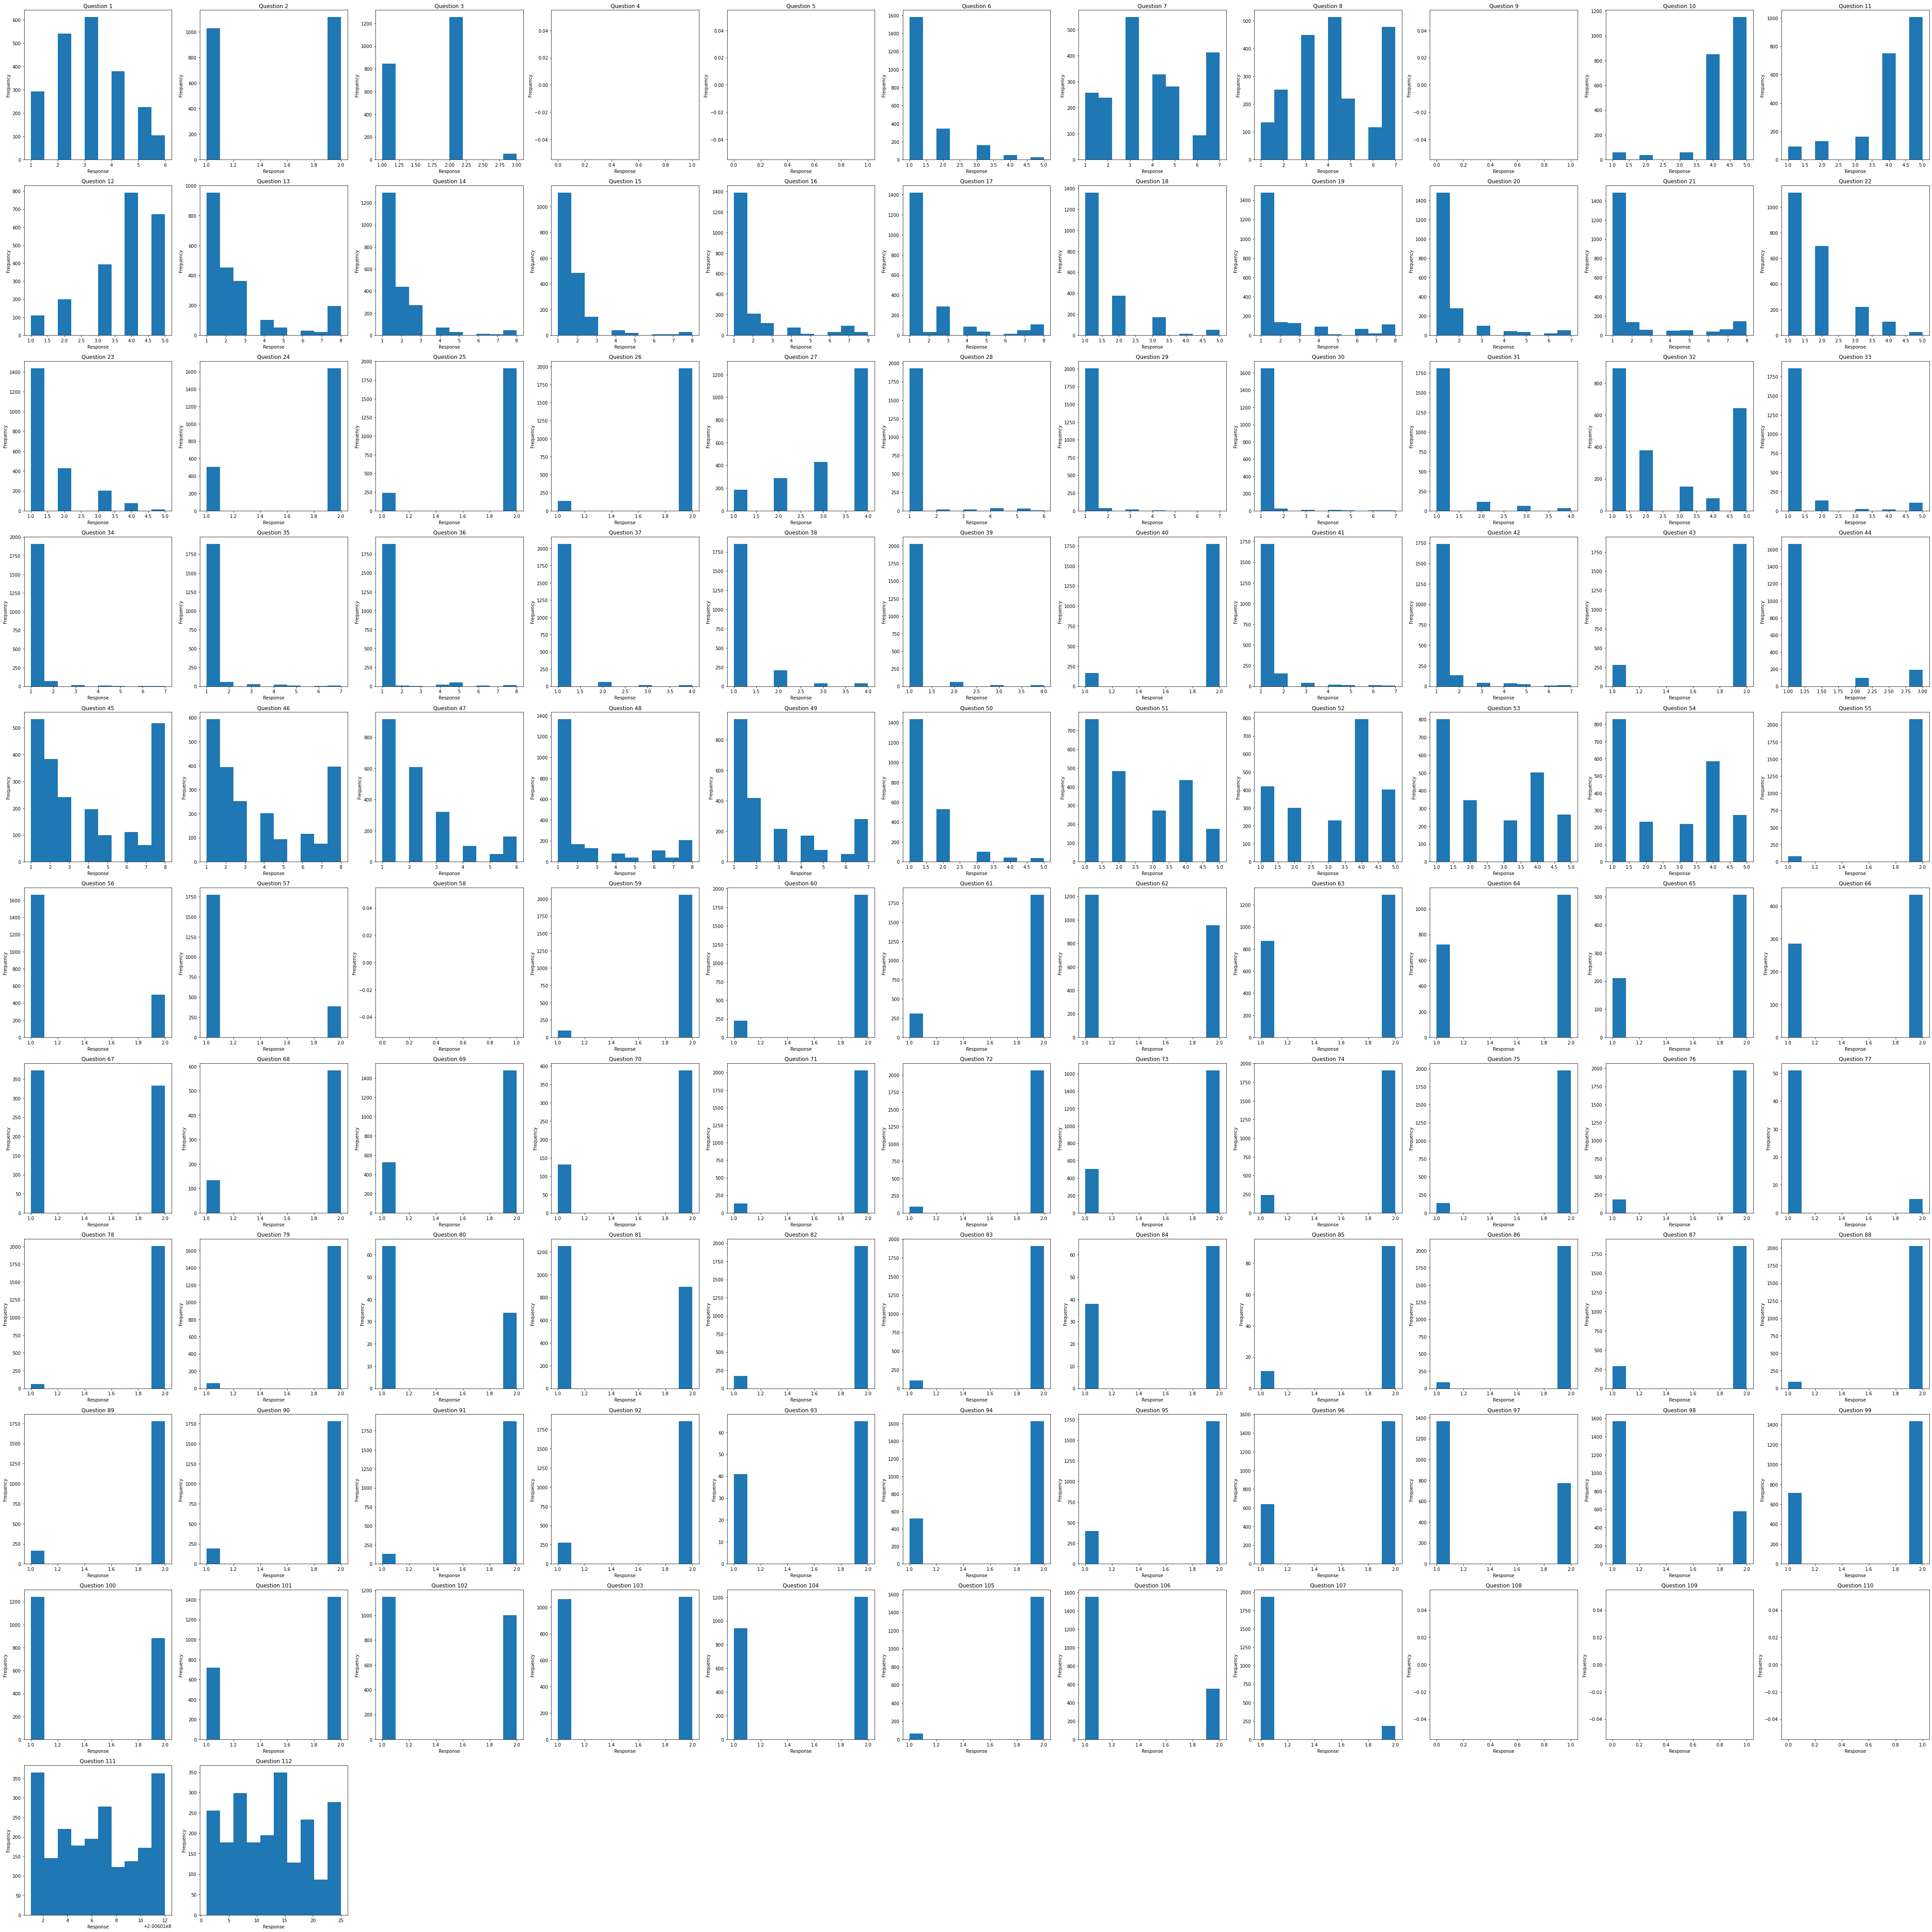

In [52]:
fig = plt.figure(figsize=(60,60))
for question in range(len(raw_data[0])):
    positive_values = []
    fig.add_subplot(round(np.sqrt(len(raw_data[0]))), round(np.sqrt(len(raw_data[0]))),1+question)   #top left
    for person in range(len(raw_data)):
        value = raw_data[person][question]
        if value.isnumeric()==True:
            positive_values.append(int(value))
    plt.hist(positive_values)
    plt.xlabel('Response')
    plt.ylabel('Frequency')
    plt.title('Question '+str(1+question))
fig.tight_layout()

In [344]:
all_positive_values = []
for question in range(len(raw_data[0])):
    positive_values = []
    for person in range(len(raw_data)):
        value = raw_data[person][question]
        if value.isnumeric()==True:
            positive_values.append(int(value))
    all_positive_values.append(positive_values+[0]*(len(question_slots) - len(positive_values)))

df = pd.DataFrame({})
for question in range(len(all_positive_values)):
    df[question] = all_positive_values[question]
corr_list = (df.corr()).values.tolist()

question = 9

top_10 = []
for question in range(len(corr_list)):
    top_corrs = sorted(range(len( np.abs(corr_list[question]))), key=lambda i:  np.abs(corr_list[question])[i])[-10:]
    ordered_corrs = []
    for element in top_corrs:
        ordered_corrs.append([question, element,  np.abs(corr_list[question])[element]])
    top_10.append(ordered_corrs)


In [362]:
used = []
for question in range(len(top_10)):
    for element in top_10[question]:
        if [element[0], element[1]] not in used and [element[1], element[0]] not in used:
            if element[2]>.8 and element[2]<1:
                print(element)
                #print(data[0][element[0]], data[0][element[1]], element[2])
                used.append([element[0], element[1]])
                used.append([element[1], element[0]])

[9, 58, 0.80980080620598]
[10, 59, 0.8432395416756178]
[48, 97, 0.8872765928663028]
[50, 99, 0.9033718511195943]
[51, 100, 0.9050487557591184]
[52, 101, 0.9160547487380366]
[53, 102, 0.924959721649025]
[64, 66, 0.8615338299497138]
[64, 65, 0.8909607276564385]
[64, 67, 0.9248800740959687]
[65, 66, 0.8543627744164989]
[65, 67, 0.9034897669530957]
[66, 67, 0.8821946805237727]
[78, 104, 0.8620074713776801]
[79, 92, 0.8538487608712626]
[79, 83, 0.8774576679318229]
[79, 84, 0.9090710136770983]
[82, 90, 0.8258141911076178]
[83, 92, 0.885817343132955]
[83, 84, 0.9400185835242325]
[84, 92, 0.9284049285834414]
[110, 111, 0.9968727865671979]


In [381]:
all_person_values = []

for person in range(len(raw_data)):
    person_values = []
    for question in range(len(raw_data[0])):
        val = raw_data[person][question]
        if val.isnumeric()==True:
            person_values.append(int(val))
        else:
            person_values.append(0)
    all_person_values.append(person_values)

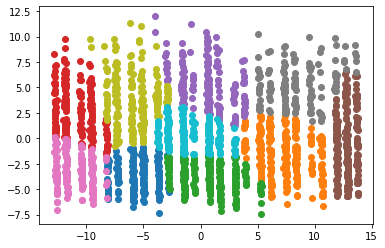

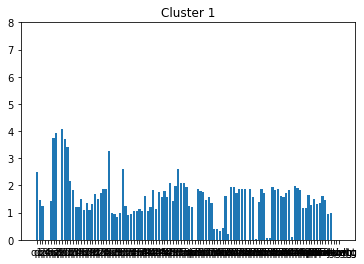

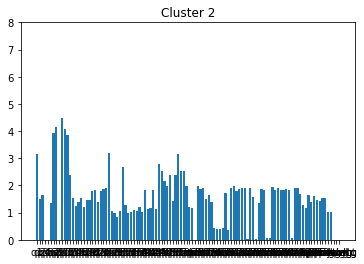

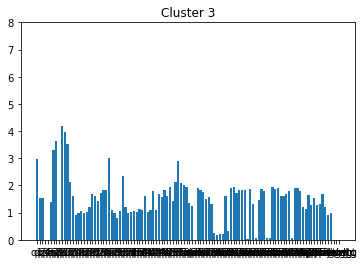

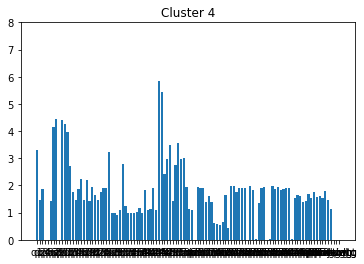

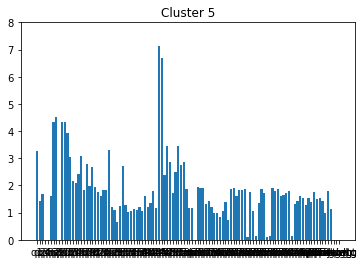

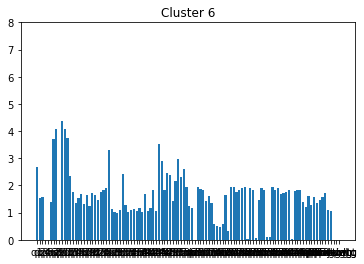

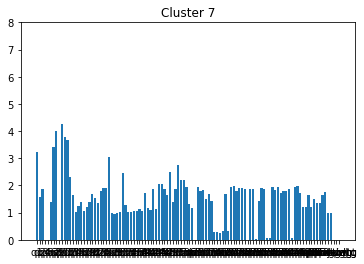

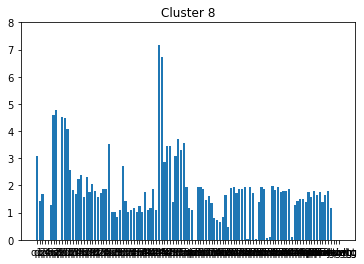

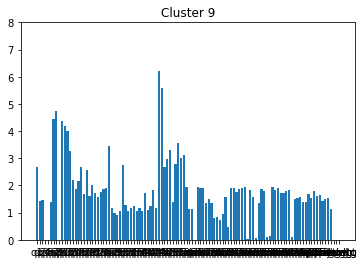

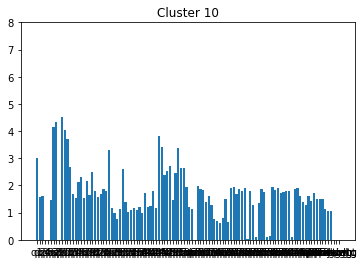

In [439]:
#Gaussian Mixture Model
K = 10

pca = PCA(2)
pca.fit(all_person_values)
pca_data = pca.transform(all_person_values)
pca_data
X=pca_data
# define the model
model = GaussianMixture(n_components=K)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

###VISUALIZE THIS NOW LIKE THE BAR PLOTS TILL DID
for cluster in range(1+max(yhat)):
    vals_by_cluster = []
    for point in range(len(yhat)):
        if yhat[point]==cluster:
            vals_by_cluster.append(all_person_values[point])
    all_question_means = []
    for question in range(len(vals_by_cluster[0])):
        question_vals = []
        for person in vals_by_cluster:
            question_vals.append(person[question])
        all_question_means.append(np.mean(question_vals))
    plt.bar(data[0][:-2], all_question_means[:-2])
    plt.title('Cluster '+str(cluster+1))
    plt.ylim(0, 8)
    plt.show()


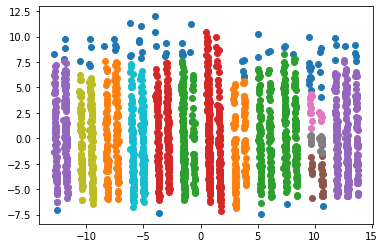

In [483]:

# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
pca = PCA(2)
pca.fit(all_person_values)
pca_data = pca.transform(all_person_values)
X= pca_data
# define the model
model = DBSCAN(eps=1.05, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

###VISUALIZE THIS NOW LIKE THE BAR PLOTS TILL DID
for cluster in range(1+max(yhat)):
    vals_by_cluster = []
    for point in range(len(yhat)):
        if yhat[point]==cluster:
            vals_by_cluster.append(all_person_values[point])
    all_question_means = []
    for question in range(len(vals_by_cluster[0])):
        question_vals = []
        for person in vals_by_cluster:
            question_vals.append(person[question])
        all_question_means.append(np.mean(question_vals))
    plt.bar(data[0][:-2], all_question_means[:-2])
    plt.title('Cluster '+str(cluster+1))
    plt.ylim(0, 8)
    plt.show()


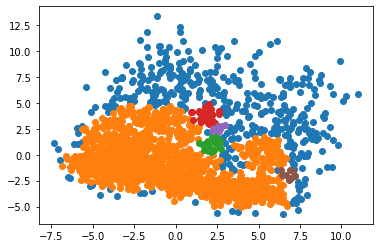

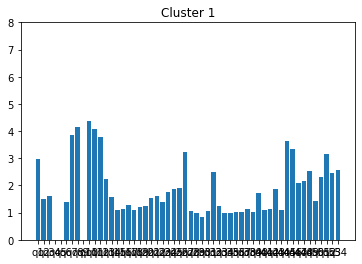

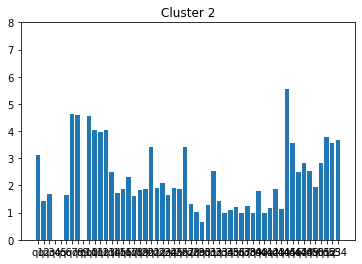

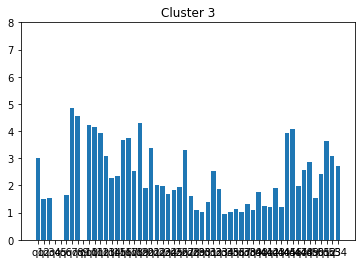

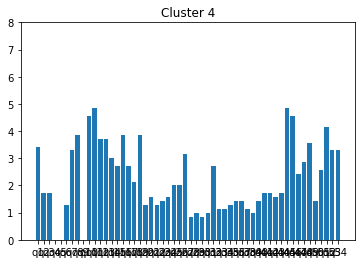

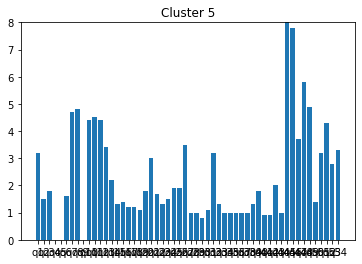

In [508]:
# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
all_person_values_truncated = []
for val in all_person_values:
    all_person_values_truncated.append(val[:54])
pca = PCA(2)
pca.fit(all_person_values_truncated)
pca_data = pca.transform(all_person_values_truncated)
X= pca_data
# define the model
model = DBSCAN(eps=.6, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

###VISUALIZE THIS NOW LIKE THE BAR PLOTS TILL DID
for cluster in range(1+max(yhat)):
    vals_by_cluster = []
    for point in range(len(yhat)):
        if yhat[point]==cluster:
            vals_by_cluster.append(all_person_values_truncated[point])
    all_question_means = []
    for question in range(len(vals_by_cluster[0])):
        question_vals = []
        for person in vals_by_cluster:
            question_vals.append(person[question])
        all_question_means.append(np.mean(question_vals))
    plt.bar(data[0][:54], all_question_means[:54])
    plt.title('Cluster '+str(cluster+1))
    plt.ylim(0, 8)
    plt.show()


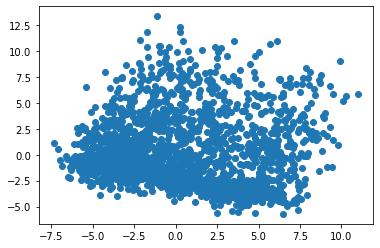

In [525]:
# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
all_person_values_truncated = []
for val in all_person_values:
    all_person_values_truncated.append(val[:54])
pca = PCA(54)
pca.fit(all_person_values_truncated)
pca_data = pca.transform(all_person_values_truncated)
X= pca_data
# define the model
model = DBSCAN(eps=.6, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

###VISUALIZE THIS NOW LIKE THE BAR PLOTS TILL DID
for cluster in range(1+max(yhat)):
    vals_by_cluster = []
    for point in range(len(yhat)):
        if yhat[point]==cluster:
            vals_by_cluster.append(all_person_values_truncated[point])
    all_question_means = []
    for question in range(len(vals_by_cluster[0])):
        question_vals = []
        for person in vals_by_cluster:
            question_vals.append(person[question])
        all_question_means.append(np.mean(question_vals))
    plt.bar(data[0][:54], all_question_means[:54])
    plt.title('Cluster '+str(cluster+1))
    plt.ylim(0, 8)
    plt.show()


In [529]:
question_means = []
for question in range(len(pca_data[0])):
    val_options = []
    for person in range(len(pca_data)):
        val_options.append(pca_data[person][question])
    question_means.append(np.mean(val_options))

In [530]:
question_means

[-4.2449703882726576e-16,
 2.0898315757650005e-16,
 -2.285753285992969e-16,
 2.6122894697062506e-17,
 3.7551661127027353e-16,
 -6.530723674265627e-17,
 -6.204187490552346e-17,
 -2.938825653419532e-17,
 1.6326809185664067e-17,
 1.1755302613678128e-16,
 -3.2653618371328136e-16,
 -2.1551388125076568e-16,
 1.8939098655370317e-16,
 -2.3510605227356256e-16,
 1.436759208338438e-16,
 1.755131987458887e-16,
 -9.143013143971877e-17,
 -5.877651306839064e-17,
 -3.591898020846095e-17,
 -1.224510688924805e-17,
 1.1428766429964846e-17,
 -3.2653618371328135e-17,
 -9.79608551139844e-18,
 -6.530723674265627e-17,
 -5.4694810771974627e-17,
 1.6326809185664067e-17,
 7.020527949835548e-17,
 9.79608551139844e-18,
 2.44902137784961e-17,
 7.510332225405471e-17,
 1.0449157878825003e-16,
 -3.142910768240333e-17,
 2.938825653419532e-17,
 3.2653618371328135e-17,
 6.693991766122267e-17,
 -1.0938962154394925e-16,
 9.79608551139844e-18,
 -9.469549327685158e-17,
 4.408238480129298e-17,
 -7.836868409118753e-17,
 -5.061